## Observations and Insights

## 

## Dependencies

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress


# Study data files
mouse_metadata = "Resources/Mouse_metadata.csv"
study_results = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

                        
# Combine the data into a single dataset
merged= pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
mouse_df = pd.DataFrame(merged)
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
regimen_df = pd.DataFrame({
    'Mean':mouse_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)'],
    'Median':mouse_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)'],
    'Variance':mouse_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)'],
    'Standart deviation':mouse_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)'],
    'SEM':mouse_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
})
regimen_df

,Mean,Median,Variance,Standart deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

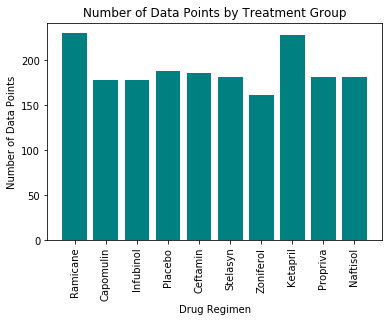

In [37]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

treatment_group = mouse_df.groupby("Drug Regimen")
treatment_df = pd.DataFrame(treatment_group.count())

x_axis = mouse_df["Drug Regimen"].unique()
y_axis = treatment_df["Mouse ID"]

plt.bar(x_axis, y_axis, color='teal', alpha=1, align="center")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points by Treatment Group")

plt.savefig("Figures/mouse_pltbar.png")


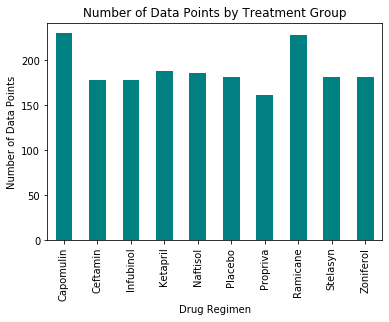

In [38]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

treatment_df["Mouse ID"].plot(kind="bar", color="teal")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points by Treatment Group")

plt.savefig("Figures/mouse_plotbar.png")


## Pie plots

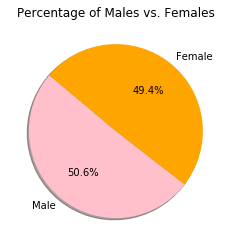

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mf_df = mouse_df["Sex"].value_counts()
male = mf_df["Male"]
female = mf_df["Female"]
mf = [male, female]

labels = ["Male", "Female"]
colors = ["pink", "orange"]

plt.pie(mf, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Percentage of Males vs. Females")

plt.savefig("Figures/mouse_pltpie.png")

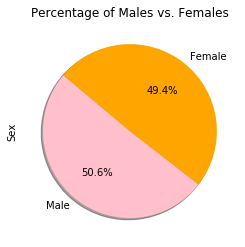

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mf_df.plot(kind="pie", labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Percentage of Males vs. Females")

plt.savefig("Figures/mouse_plotpie.png")


## Quartiles, outliers and boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

ending_volume = mouse_df.set_index("Timepoint").loc[45, :]
                                    
regimen_endingv = ending_volume.set_index("Drug Regimen")

Ramicane = regimen_endingv.loc["Ramicane", "Tumor Volume (mm3)"]
Capomulin = regimen_endingv.loc["Capomulin", "Tumor Volume (mm3)"]
Infubinol = regimen_endingv.loc["Infubinol", "Tumor Volume (mm3)"]
Placebo = regimen_endingv.loc["Placebo", "Tumor Volume (mm3)"]

ram_quartiles = Ramicane.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

cap_quartiles = Capomulin.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

inf_quartiles = Infubinol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)

pla_quartiles = Placebo.quantile([.25,.5,.75])
pla_lowerq = pla_quartiles[0.25]
pla_upperq = pla_quartiles[0.75]
pla_iqr = pla_upperq-pla_lowerq
pla_lower_bound = pla_lowerq - (1.5*pla_iqr)
pla_upper_bound = pla_upperq + (1.5*pla_iqr)


iqr_df = pd.DataFrame({"Drug Regimen": ["Ramicane","Capomulin","Infubinol","Placebo"],
                      "Lower Quartile": [ram_lowerq, cap_lowerq, inf_lowerq, pla_lowerq],
                      "Upper Quartile": [ram_upperq, cap_upperq, inf_upperq, pla_upperq],
                      "Inter Quartile Range": [ram_iqr, cap_iqr, inf_iqr, pla_iqr],
                    "Low Outliers": [ram_lower_bound, cap_lower_bound, inf_lower_bound, pla_lower_bound],
                       "High Outliers": [ram_upper_bound, cap_upper_bound, inf_upper_bound, pla_upper_bound],
                      })
iqr_df

,Drug Regimen,Lower Quartile,Upper Quartile,Inter Quartile Range,Low Outliers,High Outliers
0,Ramicane,30.981175,38.508305,7.527130,19.690480,49.799000
1,Capomulin,32.377357,40.159220,7.781863,20.704562,51.832015
2,Infubinol,62.754451,67.685569,4.931117,55.357776,75.082244
3,Placebo,65.955820,71.486792,5.530972,57.659362,79.783249


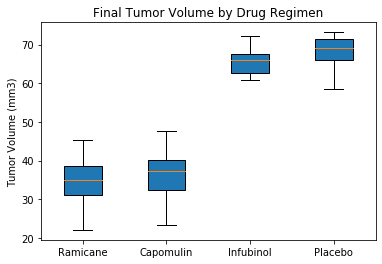

In [53]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
ending_volume = mouse_df.set_index("Timepoint").loc[45, :]
                                    
regimen_endingv = ending_volume.set_index("Drug Regimen")

Ramicane = regimen_endingv.loc["Ramicane", "Tumor Volume (mm3)"].to_list()
Capomulin = regimen_endingv.loc["Capomulin", "Tumor Volume (mm3)"].to_list()
Infubinol = regimen_endingv.loc["Infubinol", "Tumor Volume (mm3)"].to_list()
Placebo = regimen_endingv.loc["Placebo", "Tumor Volume (mm3)"].to_list()


data = (Ramicane, Capomulin, Infubinol, Placebo)
labels = ["Ramicane","Capomulin","Infubinol","Placebo"]

fig1, ax1 = plt.subplots()
bplot1 = ax1.boxplot(data, vert=True, patch_artist=True, labels=labels)  
ax1.set_title('Final Tumor Volume by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')

plt.savefig("Figures/mouse_boxplot.png")

## Line and scatter plots

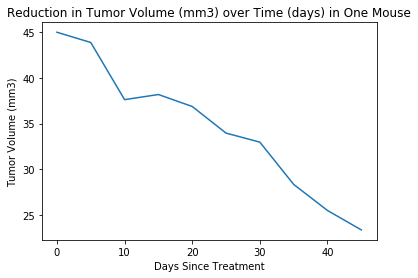

In [54]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
treatment_index = mouse_df.set_index("Drug Regimen")

timepoint_tumor = treatment_index.loc["Capomulin", "Timepoint":"Tumor Volume (mm3)"]
onemouse = timepoint_tumor.iloc[0:10, :]

timepoint = onemouse["Timepoint"].to_list()
tumor = onemouse["Tumor Volume (mm3)"].to_list()


plt.plot(timepoint, tumor)
plt.xlabel("Days Since Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Reduction in Tumor Volume (mm3) over Time (days) in One Mouse")

plt.savefig("Figures/mouse_lineplot.png")

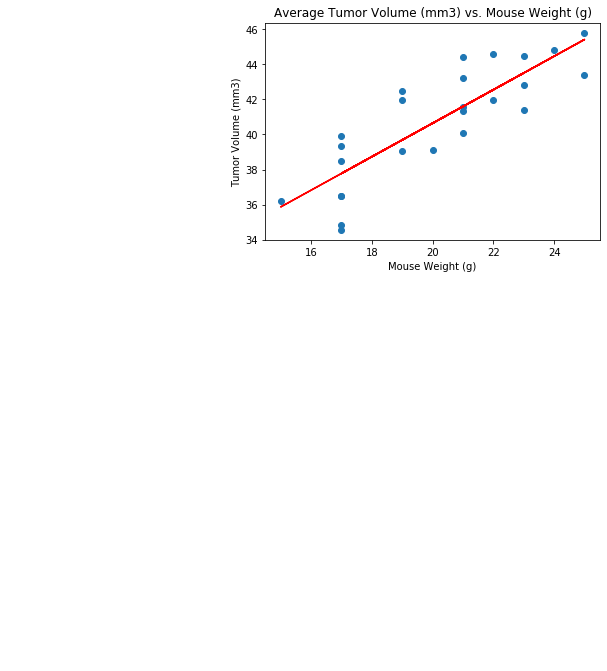

y = 0.95x + 21.55


In [55]:
capodf = mouse_df.set_index("Drug Regimen").loc["Capomulin", :] 
grouped_capo = capodf.groupby("Mouse ID") 
scatter_df = pd.DataFrame(grouped_capo.mean())

weight_regress = scatter_df.loc[:, "Weight (g)"].astype('float64') 
tumorv_regress = scatter_df.loc[:, "Tumor Volume (mm3)"].astype('float64')


plt.xlabel("Mouse Weight (g)") 
plt.ylabel("Tumor Volume (mm3)") 
plt.title("Average Tumor Volume (mm3) vs. Mouse Weight (g)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_regress, tumorv_regress)
regress_values = weight_regress * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight_regress,tumorv_regress)
plt.plot(weight_regress,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.savefig("Figures/mouse_scatterplot.png")

plt.show()
print(line_eq)